In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [3]:
import numpy as np
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


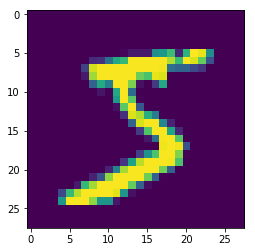

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [0]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [0]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(lr=1e-4)
dopt=tf.keras.optimizers.Adam(lr=1e-3)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, Dropout
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.layers import Reshape, UpSampling2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam

class Model:
  def __init__(self):
    self.D=None
    self.G=None
    self.AM=None
    self.DM=None
    
  def discriminator(self):
    if self.D: return self.D
    
    self.D=Sequential()
    self.D.add(Conv2D(64, 5, strides=2, input_shape=(28,28,1), padding='same'))
    self.D.add(LeakyReLU(alpha=0.2))
    self.D.add(Dropout(0.4))
    
    self.D.add(Conv2D(128, 5, strides=2, padding='same'))
    self.D.add(LeakyReLU(alpha=0.2))
    self.D.add(Dropout(0.4))
    
    self.D.add(Conv2D(256, 5, strides=2, padding='same'))
    self.D.add(LeakyReLU(alpha=0.2))
    self.D.add(Dropout(0.4))
    
    self.D.add(Conv2D(512, 5, strides=1, padding='same'))
    self.D.add(LeakyReLU(alpha=0.2))
    self.D.add(Dropout(0.4))
    
    self.D.add(Flatten())
    self.D.add(Dense(1))
    self.D.add(Activation('sigmoid'))
    self.D.summary()
    return self.D
  
  def generator(self):
    if self.G: return self.G
    
    self.G=Sequential()
    self.G.add(Dense(7*7*256, input_shape=(100,)))
    self.G.add(BatchNormalization(momentum=0.9))
    self.G.add(Activation('relu'))
    self.G.add(Reshape((7,7,256)))
    self.G.add(Dropout(0.4))
    
    self.G.add(UpSampling2D())
    self.G.add(Conv2DTranspose(128, 5, padding='same'))
    self.G.add(BatchNormalization(momentum=0.9))
    self.G.add(Activation('relu'))
    
    self.G.add(UpSampling2D())
    self.G.add(Conv2DTranspose(64, 5, padding='same'))
    self.G.add(BatchNormalization(momentum=0.9))
    self.G.add(Activation('relu'))
    
    self.G.add(Conv2DTranspose(32, 5, padding='same'))
    self.G.add(BatchNormalization(momentum=0.9))
    self.G.add(Activation('relu'))
    
    self.G.add(Conv2DTranspose(1, 5, padding='same'))
    self.G.add(Activation('sigmoid'))
    self.G.summary()
    return self.G
  
  def discriminator_model(self):
    if self.DM: return self.DM
    optimizer=Adam(lr=0.002)
    self.DM=Sequential()
    self.DM.add(self.discriminator())
    self.DM.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return self.DM
  def adversarial_model(self):
    if self.AM: return self.AM
    optimizer=Adam(lr=0.001)
    self.AM=Sequential()
    self.AM.add(self.generator())
    self.AM.add(self.discriminator())
    self.AM.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return self.AM

In [8]:
model=Model()
discriminator=model.discriminator_model()
generator=model.generator()
adversarial=model.adversarial_model()

W0831 16:51:08.630578 139833199851392 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)        

W0831 16:51:09.083105 139833199851392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
activation_1 (Activation)    (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)      

In [9]:
adversarial.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 28, 28, 1)         2394241   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 4311553   
Total params: 6,705,794
Trainable params: 6,680,258
Non-trainable params: 25,536
_________________________________________________________________


In [0]:
def make_trainable(net, val):
  net.trainable = val
  for l in net.layers:
    l.trainable = val

In [33]:
for i in range(2000):
  img_train=x_train[np.random.randint(0,60000, size=256)]
  img_train=np.reshape(img_train, [-1,28,28,1])
  noise=np.random.uniform(-1.0,1.0,size=[256,100])
  img_fake=generator.predict(noise)
  x=np.concatenate((img_train, img_fake))
  y=np.ones([256*2, 1])
  y[256:,:]=0
  make_trainable(discriminator, True)
  d_loss=discriminator.train_on_batch(x,y)
  
  y=np.ones([256,1])
  make_trainable(discriminator, False)
  noise=np.random.uniform(-1.0,1.0,size=[256,100])
  a_loss=adversarial.train_on_batch(noise,y)
  print(str(i)+": (D: loss = "+str(d_loss[0])+", acc = "+str(d_loss[1])+
        "), (A: loss = "+str(a_loss[0])+", acc = "+str(a_loss[1])+")")

W0831 17:29:39.883985 139833199851392 training.py:2197] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


0: (D: loss = 24.837559, acc = 0.5488281), (A: loss = 48.49079, acc = 0.3359375)
1: (D: loss = 22.61179, acc = 0.578125), (A: loss = 58.14173, acc = 0.234375)
2: (D: loss = 28.893541, acc = 0.5097656), (A: loss = 70.102684, acc = 0.17578125)
3: (D: loss = 23.718143, acc = 0.58984375), (A: loss = 66.46826, acc = 0.2265625)
4: (D: loss = 22.694, acc = 0.5859375), (A: loss = 66.49959, acc = 0.23046875)
5: (D: loss = 25.42328, acc = 0.5917969), (A: loss = 53.657433, acc = 0.2734375)
6: (D: loss = 18.903605, acc = 0.6347656), (A: loss = 62.97766, acc = 0.17578125)
7: (D: loss = 23.762299, acc = 0.57421875), (A: loss = 63.421234, acc = 0.17578125)
8: (D: loss = 21.657236, acc = 0.58203125), (A: loss = 57.45923, acc = 0.1953125)
9: (D: loss = 21.876167, acc = 0.5917969), (A: loss = 69.65314, acc = 0.20703125)
10: (D: loss = 21.512085, acc = 0.5605469), (A: loss = 75.076004, acc = 0.1171875)
11: (D: loss = 20.98737, acc = 0.578125), (A: loss = 66.024704, acc = 0.1640625)
12: (D: loss = 19.3829

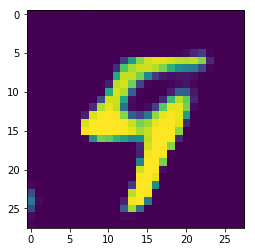

In [67]:
noise=np.random.uniform(-1.0,1.0,size=[1,100])
predict=generator.predict(noise)
predict=np.reshape(predict,(28,28))
plt.imshow(predict)